In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

## Learn the data

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

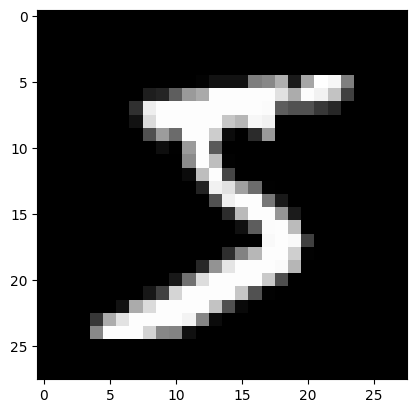

In [14]:
plt.imshow(X_train[0],cmap='gray')

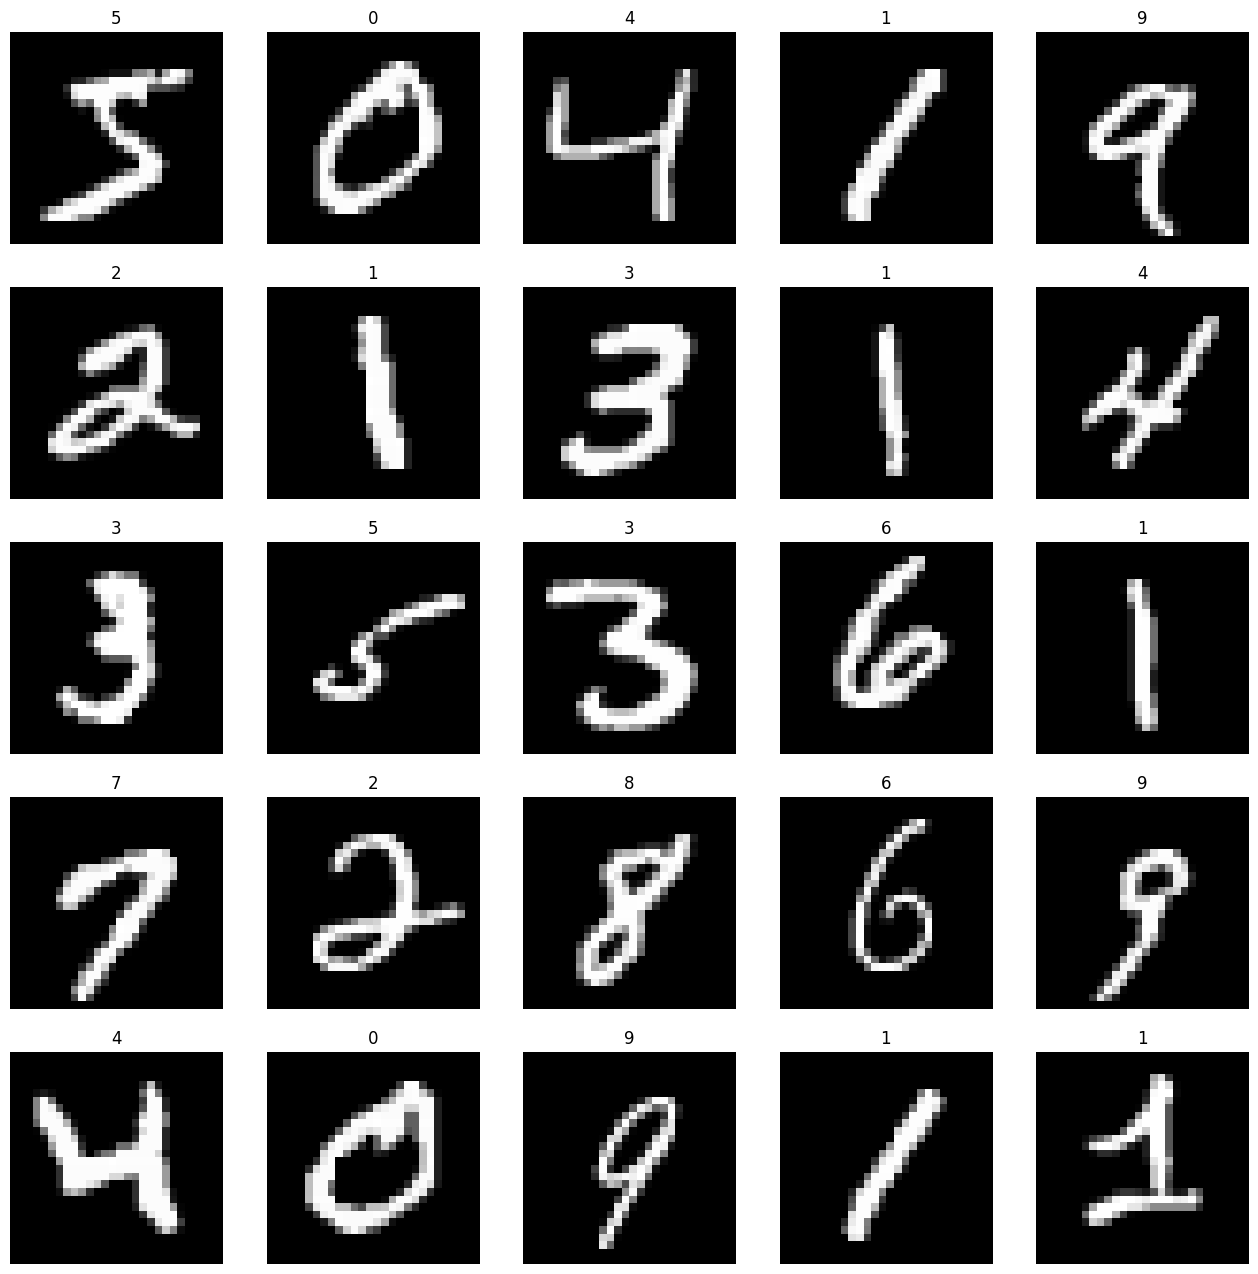

In [15]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])

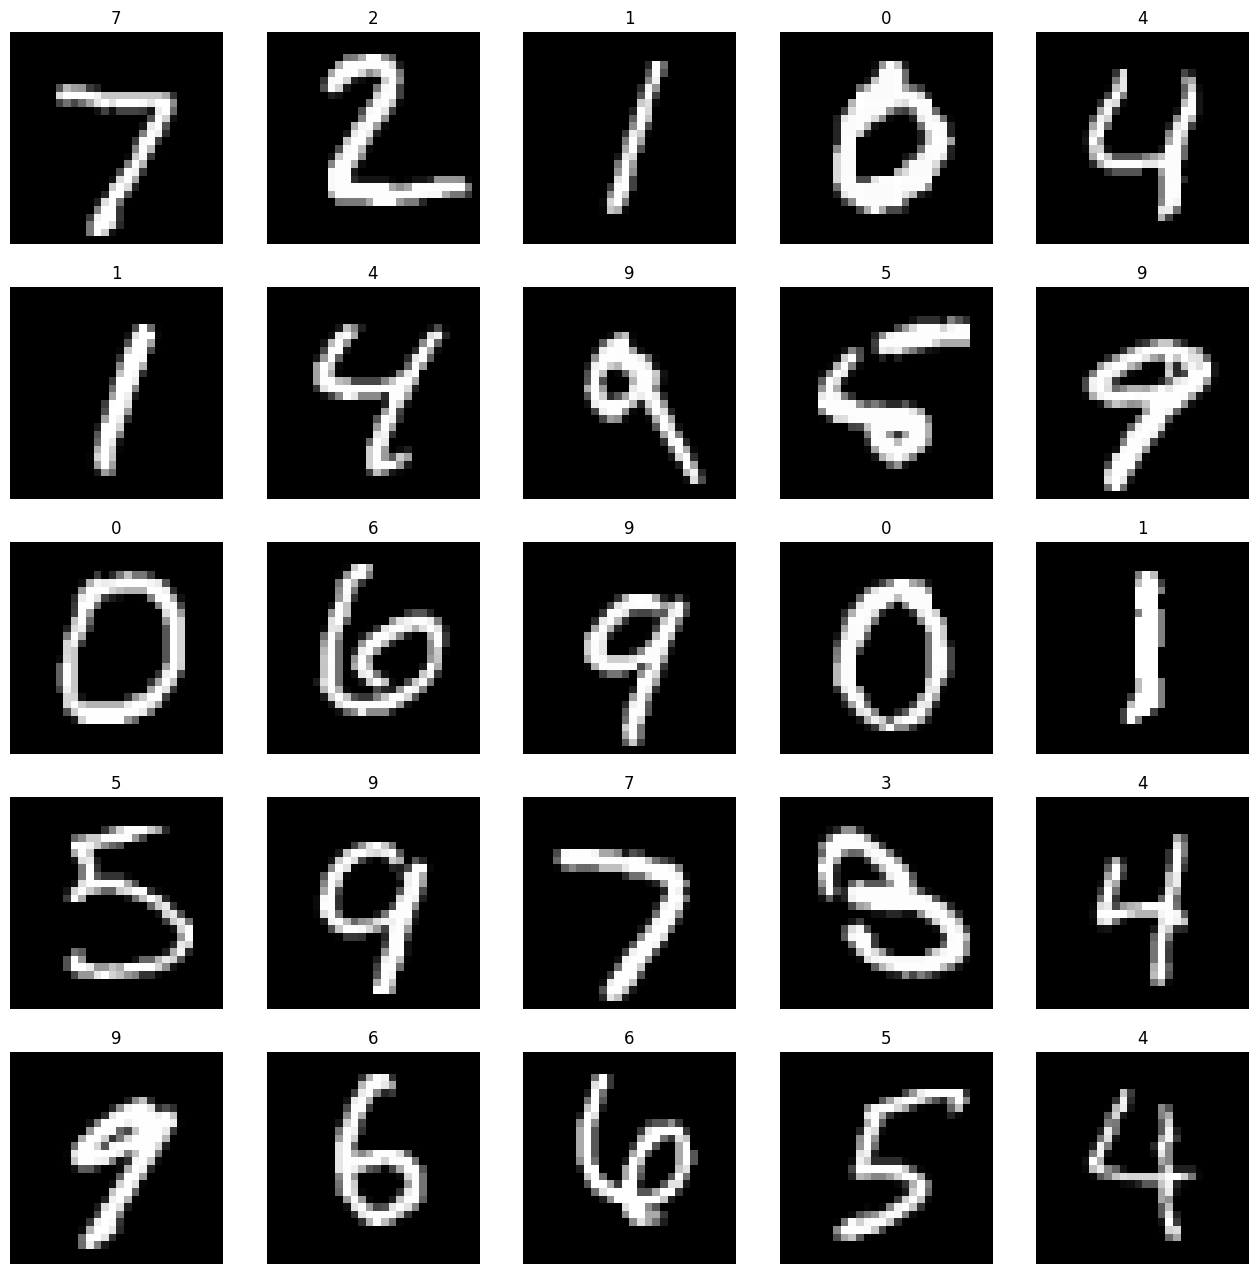

In [16]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.axis('off')
    plt.title(y_test[i])

## Data Preparation

In [17]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Normalize

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
X_train = X_train/255
X_test = X_test/255

#### Convert 2D to 1D

In [20]:
X_train[0].shape

(28, 28)

In [21]:
X_train[0].size  # Total elements in the matrix

784

In [22]:
m = np.array([[6, 3, 1], [8, 9, 7]])

In [23]:
m

array([[6, 3, 1],
       [8, 9, 7]])

In [24]:
m.flatten()

array([6, 3, 1, 8, 9, 7])

In [25]:
m.reshape(m.size)

array([6, 3, 1, 8, 9, 7])

In [26]:
np.reshape(m, m.size)

array([6, 3, 1, 8, 9, 7])

In [27]:
X_train = X_train.reshape(-1,X_train[0].size)  # Non-zero dimension, as we don't know about rows there for we give -1 there.
X_test = X_test.reshape(-1,X_test[0].size)

In [28]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

## Prepare the output variable

<Axes: xlabel='count'>

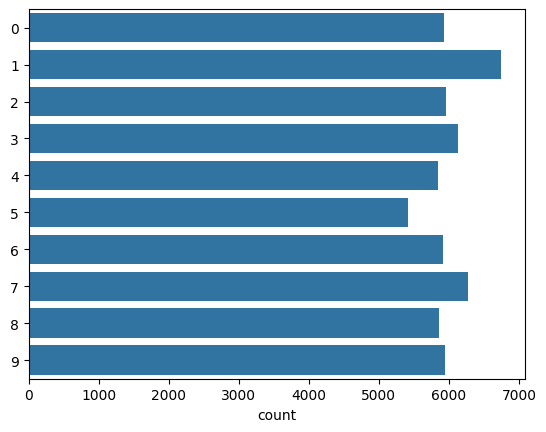

In [29]:
import seaborn as sns
sns.countplot(y = y_train)

<Axes: xlabel='count'>

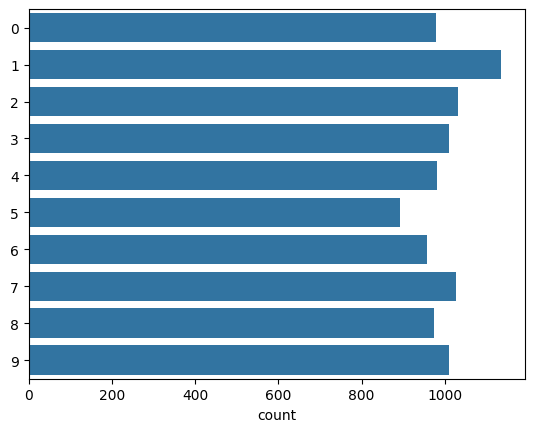

In [30]:
sns.countplot(y = y_test)

### One-hot encoded columns

In [31]:
y_train = to_categorical(y_train)  # y_train.shape is (60000,) to convert it into one-hot encoded columns use to_categorical() function
y_test = to_categorical(y_test)

In [32]:
y_train.shape

(60000, 10)

## Build the model 

In [33]:
model = Sequential()
# Input Layer
model.add(Dense(512,input_shape = (784,),activation='relu'))

# Hidden Layer
model.add(Dense(128,activation='relu'))

#Output layer
model.add(Dense(10,activation='softmax'))  # As there are 10 output columns therefore 10 neurons with softmax activation function

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
#plot_model(model,show_layer_activations=True,show_layer_names=True,show_shapes=True)

## Compile model

In [36]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Train the model

In [37]:
model.fit(X_train,y_train,epochs=10,batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 28s 4ms/step - loss: 0.1870 - accuracy: 0.9430
Epoch 2/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0876 - accuracy: 0.9729
Epoch 3/10
6000/6000 [==============================] - 27s 4ms/step - loss: 0.0627 - accuracy: 0.9805
Epoch 4/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0512 - accuracy: 0.9841
Epoch 5/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 6/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0374 - accuracy: 0.9891
Epoch 7/10
6000/6000 [==============================] - 25s 4ms/step - loss: 0.0307 - accuracy: 0.9911
Epoch 8/10
6000/6000 [==============================] - 27s 5ms/step - loss: 0.0306 - accuracy: 0.9912
Epoch 9/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.0273 - accuracy: 0.9921
Epoch 10/10
6000/6000 [==============================] - 26s 4ms/step -

## Evaluate the test data

In [38]:
model.evaluate(X_test,y_test,batch_size=1)

10000/10000 [==============================] - 25s 2ms/step - loss: 0.1066 - accuracy: 0.9808


[0.10664495825767517, 0.9807999730110168]

## Predict on new image

In [39]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
new = X_test[1234]

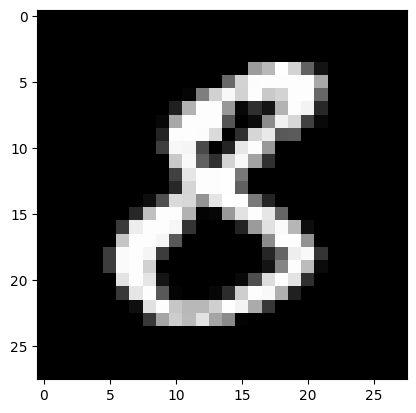

In [41]:
plt.imshow(new,cmap='gray')

In [42]:
new.shape

(28, 28)

In [43]:
y=model.predict(new.reshape(-1,new.size))

1/1 [==============================] - 0s 113ms/step


In [44]:
np.argmax(y)

8

## Prediction from image in folder

In [83]:
import cv2

In [84]:
img1 = cv2.imread('ss.jpg',0)

In [85]:
img1 = cv2.resize(img1,(28,28))

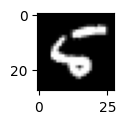

In [86]:
plt.figure(figsize=(1,1))
plt.imshow(img1,cmap='gray')

In [87]:
y=model.predict(img1.reshape(-1,img1.size))
y

1/1 [==============================] - 0s 32ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [88]:
np.argmax(y)

5